In [2]:
import tensorflow as tf
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import data

In [3]:
SEED = 100
NUM_EXAMPLES = 50
CLASSES = 3
DISTRIBUTIONS = 6

In [4]:
class TFLogreg:
    
    """
        Class that represents a tensorflow implementation of Logistic Regression model.
    """

    def __init__(self, D, C, param_delta=0.1, param_lambda=0.01):
        """Arguments:
           - D: dimensions of each datapoint
           - C: number of classes
           - param_delta: training step
           - param_lambda= regularization strength
        """
        # definicija podataka i parametara:
        # definirati self.X, self.Yoh_, self.W, self.b
        self.X = tf.placeholder(dtype=tf.float32, shape=[None, D])
        self.Yoh_ = tf.placeholder(dtype=tf.float32, shape=[None, C])
        self.W = tf.Variable(initial_value=tf.random_normal([D, C]))
        self.b = tf.Variable(initial_value=tf.random_normal([1, C]))

        # formulacija modela: izračunati self.probs
        #   koristiti: tf.matmul, tf.nn.softmax
        self.probs = tf.nn.softmax(tf.matmul(self.X, self.W) + self.b)

        # formulacija gubitka: self.loss
        #   koristiti: tf.log, tf.reduce_sum, tf.reduce_mean
        self.cross_entropy = tf.reduce_mean(-tf.reduce_sum(self.Yoh_ * tf.log(self.probs), reduction_indices=[1]))
        self.regularization = param_lambda * tf.nn.l2_loss(self.W)
        self.loss = self.cross_entropy + self.regularization

        # formulacija operacije učenja: self.train_step
        #   koristiti: tf.train.GradientDescentOptimizer,
        #              tf.train.GradientDescentOptimizer.minimize
        self.train_step = tf.train.GradientDescentOptimizer(param_delta).minimize(self.loss)

        # instanciranje izvedbenog konteksta: self.session
        #   koristiti: tf.Session
        # better than tf.Session(), installs itself as default, we can use obj.eval()
        self.session = tf.InteractiveSession()

    def train(self, X, Yoh_, param_niter):
        """Arguments:
           - X: actual datapoints [NxD]
           - Yoh_: one-hot encoded labels [NxC]
           - param_niter: number of iterations
        """
        # incijalizacija parametara
        #   koristiti: tf.initialize_all_variables
        self.session.run(tf.initialize_all_variables())

        # optimizacijska petlja
        #   koristiti: tf.Session.run
        for i in range(param_niter+1):
            tr, loss = self.session.run([self.train_step, self.loss], feed_dict={self.X: X, self.Yoh_: Yoh_})
            if i % 1000 == 0:
                print("{0:4}. Loss: {1:.8f}".format(i, loss))

    def eval(self, X):
        """Arguments:
           - X: actual datapoints [NxD]
           Returns: predicted class probabilites [NxC]
        """
        #   koristiti: tf.Session.run
        # ispiši performansu (preciznost i odziv po razredima)
        probs = self.session.run(self.probs, feed_dict={self.X: X})
        return probs

    def classify(self, X):
        return np.argmax(self.eval(X), axis=1)

    def eval_perf(self, Y, Y_):
        predicted = tf.argmax(Y, axis=1)
        correct = tf.argmax(Y_, axis=1)

        TP = tf.count_nonzero(predicted * correct, dtype=tf.float32)
        TN = tf.count_nonzero((predicted - 1) * (correct - 1), dtype=tf.float32)
        FP = tf.count_nonzero(predicted * (correct - 1), dtype=tf.float32)
        FN = tf.count_nonzero((predicted - 1) * correct, dtype=tf.float32)

        accuracy = (TP + TN) / (TP + TN + FP + FN)
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = 2 * precision * recall / (precision + recall)

        acc, prec, rec, f_1 = self.session.run([accuracy, precision, recall, f1], feed_dict={self.X: X})

        print("Accuracy: {0:.3f}\n"
              "Precision: {1:.3f}\n"
              "Recall: {2:.3f}\n"
              "F1: {3:.3f} ".format(acc, prec, rec, f_1))

In [6]:
np.random.seed(SEED)
tf.set_random_seed(SEED)

In [7]:
X, Y_ = data.sample_gmm_2d(DISTRIBUTIONS, CLASSES, NUM_EXAMPLES)

In [9]:
Yoh_ = Y_.reshape(-1)
Yoh_ = np.eye(CLASSES)[Yoh_]

In [10]:
tflr = TFLogreg(X.shape[1], Yoh_.shape[1], param_delta=0.01, param_lambda=0.01)

In [11]:
# nauči parametre:
tflr.train(X, Yoh_, 10000)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
   0. Loss: 6.67537117
1000. Loss: 0.97955811
2000. Loss: 0.96849614
3000. Loss: 0.96399093
4000. Loss: 0.96195590
5000. Loss: 0.96092510
6000. Loss: 0.96034324
7000. Loss: 0.95998263
8000. Loss: 0.95974195
9000. Loss: 0.95957202
10000. Loss: 0.95944655


In [12]:
# dohvati vjerojatnosti na skupu za učenje
probs = tflr.eval(X)
probs

array([[ 0.13404585,  0.46274838,  0.40320575],
       [ 0.26337862,  0.34270662,  0.39391482],
       [ 0.25084862,  0.35922983,  0.38992161],
       [ 0.2032222 ,  0.39850006,  0.3982777 ],
       [ 0.29072362,  0.32699308,  0.38228324],
       [ 0.20343445,  0.38597724,  0.41058838],
       [ 0.36221355,  0.28273496,  0.35505152],
       [ 0.17251596,  0.41673818,  0.4107458 ],
       [ 0.12419388,  0.45765364,  0.41815251],
       [ 0.39242682,  0.25723717,  0.35033607],
       [ 0.30107859,  0.31707913,  0.38184223],
       [ 0.23978475,  0.361065  ,  0.39915025],
       [ 0.11689641,  0.46529928,  0.41780433],
       [ 0.38131863,  0.26929998,  0.34938136],
       [ 0.49765512,  0.20581807,  0.29652685],
       [ 0.38655305,  0.26304269,  0.3504042 ],
       [ 0.34698054,  0.28647092,  0.36654851],
       [ 0.25062397,  0.35761616,  0.3917599 ],
       [ 0.38697371,  0.26887512,  0.3441512 ],
       [ 0.24367078,  0.35698044,  0.39934883],
       [ 0.35955581,  0.28158417,  0.358

In [13]:
tflr.eval_perf(probs, Yoh_)

Accuracy: 0.613
Precision: 0.623
Recall: 0.609
F1: 0.616 


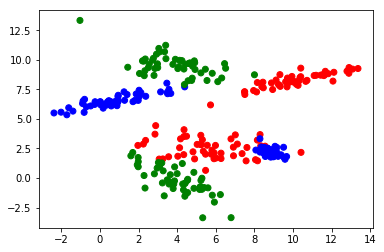

In [8]:
colors = ['red', 'green', 'blue']
plt.scatter(X[:, 0], X[:, 1], c=Y_.flatten(), cmap=ListedColormap(colors))
plt.show()

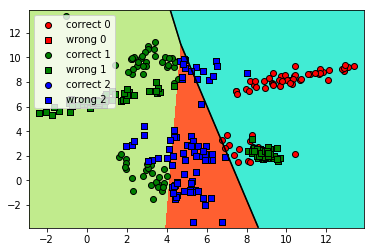

In [14]:
data.plot_decision_boundary(X, lambda x: tflr.classify(x))
# graph the data points
data.graph_data(X, Y_, np.argmax(probs, axis=1))

In [97]:
SEED = 125
np.random.seed(SEED)
tf.set_random_seed(SEED)

In [98]:
X2, Y_2 = data.sample_gmm_2d(DISTRIBUTIONS, CLASSES, NUM_EXAMPLES)

In [99]:
Yoh_2 = Y_2.reshape(-1)
Yoh_2 = np.eye(CLASSES)[Yoh_2]

In [100]:
tflr2 = TFLogreg(X2.shape[1], Yoh_2.shape[1], param_delta=0.01, param_lambda=0.01)

In [101]:
# nauči parametre:
tflr2.train(X2, Yoh_2, 50000)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
   0. Loss: 4.08024073
1000. Loss: 0.48734772
2000. Loss: 0.45736790
3000. Loss: 0.43448767
4000. Loss: 0.41630250
5000. Loss: 0.40140697
6000. Loss: 0.38890517
7000. Loss: 0.37820920
8000. Loss: 0.36891946
9000. Loss: 0.36075431
10000. Loss: 0.35350800
11000. Loss: 0.34702590
12000. Loss: 0.34118885
13000. Loss: 0.33590287
14000. Loss: 0.33109239
15000. Loss: 0.32669595
16000. Loss: 0.32266259
17000. Loss: 0.31894970
18000. Loss: 0.31552151
19000. Loss: 0.31234717
20000. Loss: 0.30940038
21000. Loss: 0.30665854
22000. Loss: 0.30410188
23000. Loss: 0.30171290
24000. Loss: 0.29947668
25000. Loss: 0.29737949
26000. Loss: 0.29540965
27000. Loss: 0.29355672
28000. Loss: 0.29181084
29000. Loss: 0.29016376
30000. Loss: 0.28860793
31000. Loss: 0.28713626
32000. Loss: 0.28574270
33000. Loss: 0.28442180
34000. Loss: 0.28316841
35000. Loss: 0.28197744
36000. Loss: 0.28084531
37000. Loss: 0.27976763
38000. Loss: 0.27874112


In [102]:
probs2 = tflr2.eval(X2)

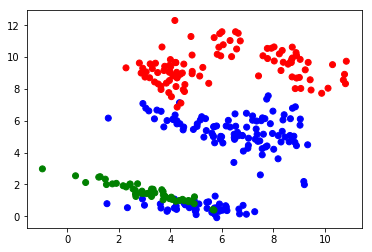

In [103]:
plt.scatter(X2[:, 0], X2[:, 1], c=Y_2.flatten(), cmap=ListedColormap(colors))
plt.show()

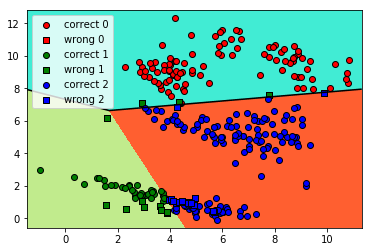

In [104]:
data.plot_decision_boundary(X2, lambda x: tflr2.classify(x))
# graph the data points
data.graph_data(X2, Y_2, np.argmax(probs2, axis=1))